In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import inspect
import pandas as pd
pd.options.display.max_rows = 10

%config InlineBackend.figure_format="retina"

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
       

# Data Manipulation with Pandas




[Pandas](http://pandas.pydata.org/) is a Python library that provides rich data structures and functions designed to make working with *structured data* fast, easy, and expressive.


<img src="https://pandas.pydata.org/static/img/pandas.svg"  width="380px">

- It provides two main data structures: the `Series` which holds a **1-dimensional sequence** of ***homogeneous*** values, and the `DataFrame`, which holds a ***tabular***, ***heterogeneous*** dataset. 

- It also contains a large number of functions and methods to manipulate and summarize `Series` and `DataFrame` objects.



Pandas is built on top of NumPy and makes it easy to use in NumPy-centric applications.



In [2]:
import pandas as pd  # abbreviated as pd conventionally

In [3]:
pd.__version__

'1.0.5'


---

# 1 `Series`


A pandas [`Series`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) is a ***1-dimensional*** array of ***labeled*** data, and can be thought of either as 

- a generalization of a NumPy array, or

- a specialization of a Python dictionary

and can thereby be created accordingly.

In [4]:
ser1 = pd.Series([4, 7, 5, 3]); ser1

0    4
1    7
2    5
3    3
dtype: int64

In [5]:
ser1 = pd.Series([4, 7, 5, 3], index=['Thu', 'Sun', 'Fri', 'Wed']); ser1

Thu    4
Sun    7
Fri    5
Wed    3
dtype: int64

<div class="alert alert-info"> If the index argument takes no inputs, the resulting Series will be indexed by sequential integers as expected.</div>

The `Series` object wraps both a sequence of values and a sequence of index labels, which we can access with the `values` and `index` attributes:

In [0]:
# The values are simply a familiar NumPy array
ser1.values  

array([4, 7, 5, 3], dtype=int64)

In [0]:
ser1.index

Index(['Thu', 'Sun', 'Fri', 'Wed'], dtype='object')

<div class="alert alert-info">The index is an array-like object of type pd.Index, which will be discussed in one optional section momentarily.</div>



Apart from making data more readable, the explicit index definition gives the `Series` object additional capabilities.

E.g., dictionary-style and array-style item access can be mixed:

In [0]:
ser1['Thu']

4

In [40]:
ser1['Sun':'Wed']               # the end index is included

Sun    7
Fri    5
Wed    3
dtype: int64

In [0]:
ser1[['Sun', 'Wed', 'Fri']]     # an instance of array-like fancy indexing with explicitly defined index

Sun    7
Wed    3
Fri    5
dtype: int64

The values of a `Series` are indexed by an ***implicit Python-style*** index (***location-based*** indexing) as well:

In [8]:
ser1[0]

4

In [10]:
ser1[1:4]          # the end index is excluded

Sun    7
Fri    5
Wed    3
dtype: int64

In [11]:
ser1[[1, 3, 2]]   # an instance of array-like fancy indexing with implicitly defined index

Sun    7
Wed    3
Fri    5
dtype: int64


<div class="alert alert-info">These slicing and indexing conventions can be a source of confusion. To avoid potential confusions, pandas provides some special indexer attributes that explicitly expose certain indexing schemes. </div>

The `Series`-as-dictionary analogy becomes clearer by constructing a `Series` directly from a Python dictionary:

In [0]:
distr_pop_dict = {'Wan Chai': 150900, 'North': 310800, 'Sai Kung': 448600, 'Sha Tin': 648200}
distr_pop = pd.Series(distr_pop_dict); distr_pop

Wan Chai    150900
North       310800
Sai Kung    448600
Sha Tin     648200
dtype: int64

<div class="alert alert-info">While a dictionary is a structure that maps arbitrary keys to a set of arbitrary values, a Series is a structure which maps typed keys to a set of typed values. The type information of a Pandas Series makes it much more efficient than Python dictionaries for certain operations.</div>

---

## Constructing `Series`

Various ways of constructing a `Series` are just some version of the following:

<pre>
pd.Series(data, index=index)
</pre>

where `index` is an optional argument, and `data` can be one of many entities. For example：

- `data` can be a list or NumPy array, in which case index defaults to an integer sequence;
- `data` can be a dictionary, in which `index` defaults to the dictionary keys. In this case, the `index` can be explicitly set to identify keys that populate a `Series`.

In [13]:
pd.Series([4, 7, 5, 3])

0    4
1    7
2    5
3    3
dtype: int64

In [44]:
pd.Series({2: 'a', 1: 'b', 3: 'c'}, 
          index=[3, 2, 3])

3    c
2    a
3    c
dtype: object



---
# 2 `DataFrame`s

A [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) represents a ***tabular*** data structure containing an ***ordered*** collection of columns, each of which can be a different value type (numeric, string, Boolean, etc.). 






<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>population</th>
      <th>area</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>North</th>
      <td>310800</td>
      <td>136.61</td>
    </tr>
    <tr>
      <th>Sai Kung</th>
      <td>448600</td>
      <td>129.65</td>
    </tr>
    <tr>
      <th>Sha Tin</th>
      <td>648200</td>
      <td>68.71</td>
    </tr>
    <tr>
      <th>Wan Chai</th>
      <td>150900</td>
      <td>9.83</td>
    </tr>
  </tbody>
</table>




A `DataFrame` can also be thought of either as 

- a generalization of a NumPy array, or

- a specialization of a Python dictionary

and can thereby be created accordingly.





In the `DataFrame`-as-dictionary analogy, the `DataFrame` maps names to a sequence of aligned `Series` objects, each being a column of the tabular structure. 

In [45]:
distr_area_dict = {'Sai Kung': 129.65, 
                   'North': 136.61, 
                   'Wan Chai': 9.83, 
                   'Sha Tin': 68.71}
distr_area = pd.Series(distr_area_dict); distr_area

Sai Kung    129.65
North       136.61
Wan Chai      9.83
Sha Tin      68.71
dtype: float64

In [46]:
distr_pop_dict = {'Wan Chai': 150900, 
                  'North': 310800, 
                  'Sai Kung': 448600, 
                  'Sha Tin': 648200}
distr_pop = pd.Series(distr_pop_dict); distr_pop

Wan Chai    150900
North       310800
Sai Kung    448600
Sha Tin     648200
dtype: int64

If we use a dictionary to construct a `DataFrame` object based on these two `Series` objects, their data are ***aligned via index labels***, which are sorted in the result:

In [47]:
district = pd.DataFrame({'population': distr_pop, 'area': distr_area}); district

,population,area
North,310800,136.61
Sai Kung,448600,129.65
Sha Tin,648200,68.71
Wan Chai,150900,9.83


Like the `Series`, the `DataFrame` has an `index` attribute that gives access to the `index` labels. Additionally, it has a `columns` attribute, which is an `Index` object holding the `column` labels:


In [48]:
district.index

Index(['North', 'Sai Kung', 'Sha Tin', 'Wan Chai'], dtype='object')

In [49]:
district.columns

Index(['population', 'area'], dtype='object')


Therefore, a `DataFrame` is an analog of a 2-dimensional array where both the rows and columns have a generalized index for accessing the data.
 

In [0]:
district['area']   # return the corresponding column

North       136.61
Sai Kung    129.65
Sha Tin      68.71
Wan Chai      9.83
Name: area, dtype: float64

In [0]:
district.area 

North       136.61
Sai Kung    129.65
Sha Tin      68.71
Wan Chai      9.83
Name: area, dtype: float64

But `district['North']` returns a key error. More details on indexing `DataFrame`s later.

---

## 2.1 Constructing `DataFrame`s

In addition to constructing a `DataFrame` from a dictionary of `Series`, many other ways are available to do so:

In [0]:
pd.DataFrame(distr_pop, columns=['population'])  # from Series objects

,population
Wan Chai,150900
North,310800
Sai Kung,448600
Sha Tin,648200


In [0]:
pd.DataFrame([{'a': i, 'b': 2 * i} for i in range(3)])  # from a list of dictionaries

,a,b
0,0,0
1,1,2
2,2,4


In [0]:
pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c'])  # from a 2-dimensional NumPy array

,foo,bar
a,0.606169,0.180135
b,0.354715,0.272737
c,0.890877,0.241373



---

### The `Index` Object (Optional)

Both the `Series` and `DataFrame` objects contain an explicit index that allows us to reference and modify data. 

This `Index` object is an interesting structure in itself, and it can be thought of 

 - either as an ***immutable*** array or 
 
 - as an ordered set (technically a multi-set, as Index objects may contain repeated values). 
 

In [0]:
ind_a = pd.Index([2, 3, 5, 7, 11])    # construct an Index from a list of integers

In [0]:
ind_a[1]                              # indexing as an array

3

In [0]:
ind_a.size, ind_a.shape, ind_a.ndim   # attributes familiar from NumPy arrays

(5, (5,), 1)

In [0]:
ind_a[1] = 0    # immutable

TypeError: Index does not support mutable operations

In [0]:
ind_b = pd.Index([1, 3, 5, 7, 9])

In [0]:
ind_a & ind_b, ind_a | ind_b, ind_a.intersection(ind_b)  # set operations and methods 

(Int64Index([3, 5, 7], dtype='int64'),
 Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64'),
 Int64Index([3, 5, 7], dtype='int64'))


---

## 2.2 Data Selection in `DataFrame`s


The `DataFrame`-as-dictionary and -as-array analogies can be helpful to keep in mind as we explore data selection within this structure.



In [0]:
district

,population,area
North,310800,136.61
Sai Kung,448600,129.65
Sha Tin,648200,68.71
Wan Chai,150900,9.83


In [0]:
district['area']    

North       136.61
Sai Kung    129.65
Sha Tin      68.71
Wan Chai      9.83
Name: area, dtype: float64

In [22]:
district['density'] = district['population'] / district['area']  # can also be used to modify the object
district

,population,area,density
North,310800,136.61,2275.089671
Sai Kung,448600,129.65,3460.084844
Sha Tin,648200,68.71,9433.852423
Wan Chai,150900,9.83,15350.966429


For array-style indexing, because both implicit and explict indexing schemes work with `DataFrame`s, the ambiguity about which indexing scheme Python actually uses sometimes arises.



Pandas provids two special indexer attributes,`loc` and `iloc`, that explicitly expose the indexing schemes to apply:


- The `loc` attribute allows indexing and slicing that always references the explicit index (***label-based*** indexing):


In [23]:
district

,population,area,density
North,310800,136.61,2275.089671
Sai Kung,448600,129.65,3460.084844
Sha Tin,648200,68.71,9433.852423
Wan Chai,150900,9.83,15350.966429


In [24]:
district.loc['Sai Kung':'Wan Chai', :'area']

,population,area
Sai Kung,448600,129.65
Sha Tin,648200,68.71
Wan Chai,150900,9.83


In [25]:
district.loc['Sai Kung':'Wan Chai']

,population,area,density
Sai Kung,448600,129.65,3460.084844
Sha Tin,648200,68.71,9433.852423
Wan Chai,150900,9.83,15350.966429


In [26]:
district.loc[['Sai Kung', 'Wan Chai'], 
             ['population', 'density']]

,population,density
Sai Kung,448600,3460.084844
Wan Chai,150900,15350.966429


In [36]:
district.loc[(district.area > 100).values, 
             [True, True, False]]

,population,area
North,310800,136.61
Sai Kung,448600,129.65


In [31]:
 # take a function that expects a DataFrame and outputs a Boolean array
    
district.loc[lambda x: [i.startswith('S') for i in x.index], :]  

,population,area,density
Sai Kung,448600,129.65,3460.084844
Sha Tin,648200,68.71,9433.852423


-  The `iloc` attribute allows indexing and slicing that always references the implicit Python-style index (***location-based*** indexing):

In [0]:
district.iloc[1:3, :2]

,population,area
Sai Kung,448600,129.65
Sha Tin,648200,68.71


In [32]:
district.iloc[[1, 3], 1:]

,area,density
Sai Kung,129.65,3460.084844
Wan Chai,9.83,15350.966429


In [35]:
district.iloc[(district.density > 10000).values, [True, True, False]]

,population,area
Wan Chai,150900,9.83


In [0]:
district.iloc[lambda x: [i for i in range(len(x)) if i % 2 == 0], lambda x: [i.startswith('a') for i in x.columns]]

,area
North,136.61
Sha Tin,68.71



---

## 2.3 Vectorized Operations on `DataFrame`s

Because pandas is built on top of NumPy, arithmetic and relational operators and NumPy ufuncs work on `Series` and `DataFrame` objects as they do with Numpy arrays.



In [51]:
rng = np.random.RandomState(42)
df_a = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=list('AB'))

In [16]:
df_a

,A,B
0,6,19
1,14,10


In [0]:
df_a > 10 

,A,B
0,False,True
1,True,False


In [0]:
df_a * 2

,A,B
0,12,38
1,28,20


In [11]:
np.sqrt(df_a)

,A,B
0,2.449490,4.358899
1,3.741657,3.162278


For binary operations on two `Series` or `DataFrame` objects, pandas will align indices (and columns for `DataFrame`s) in the process of performing the operation:

In [0]:
df_b = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('BAC'))
display('df_a', 'df_b', 'df_a + df_b')

df_a
    A   B
0   6  19
1  14  10

df_b
   B  A  C
0  7  4  6
1  9  2  6
2  7  4  3

df_a + df_b
      A     B   C
0  10.0  26.0 NaN
1  16.0  19.0 NaN
2   NaN   NaN NaN

<div class='alert alert-info'>Notice that indices and columns are aligned correctly irrespective of their orders in the two source objects, and indices and columns in the result are sorted. The result contains the union of indices and colums. </div>

Any item for which one or the other does not have an entry is marked with `NaN`, or "Not a Number," which is how pandas marks **missing** or **null values**.


--- 

### Applying Abitrary Functions Element-wise (Optional)

`DataFrame` objects' [`applymap()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) method (`Series` objects' [`map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) method) vectorizes an arbitrary function taking a single value and returning a single value:






In [0]:
df_b.applymap(type)

,B,A,C
0,<class 'int'>,<class 'int'>,<class 'int'>
1,<class 'int'>,<class 'int'>,<class 'int'>
2,<class 'int'>,<class 'int'>,<class 'int'>


In [0]:
df_b['A'].map(lambda x: 'week_' + str(x))

0    week_4
1    week_2
2    week_4
Name: A, dtype: object

---

## 2.4 Handling Missing Values

In [18]:
df_w_nan = pd.DataFrame({'A':[1, 2, np.nan],  'B':[5, np.nan, np.nan], 'C':[4, 5, 6]}); df_w_nan

,A,B,C
0,1.0,5.0,4
1,2.0,NaN,5
2,NaN,NaN,6



Pandas provides several useful methods for detecting, removing, and replacing missing values in pandas data structures:

- [`isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) generates a boolean mask indicating missing values, while [`notnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notna.html) produces the opposite:


In [0]:
df_w_nan.isnull()

,A,B,C
0,False,False,False
1,False,True,False
2,True,True,False


In [0]:
df_w_nan.notnull()

,A,B,C
0,True,True,True
1,True,False,True
2,False,False,True



- [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) returns a filtered version of the data:

In [0]:
df_w_nan.dropna(axis=0)

,A,B,C
0,1.0,5.0,4


In [0]:
df_w_nan.dropna(axis=1)

,C
0,4
1,5
2,6



- [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) returns a copy of the data with missing values filled or imputed:

In [17]:
import inspect

In [0]:
inspect.signature(df_w_nan.fillna)

<Signature (value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)>

In [0]:
df_w_nan

,A,B,C
0,1.0,5.0,4
1,2.0,NaN,5
2,NaN,NaN,6


In [0]:
df_w_nan.fillna(0)

,A,B,C
0,1.0,5.0,4
1,2.0,0.0,5
2,0.0,0.0,6


In [20]:
df_w_nan.fillna(method='ffill', axis=0)

,A,B,C
0,1.0,5.0,4
1,2.0,5.0,5
2,2.0,5.0,6




---

## 2.5 Combining Data


Some interesting studies require combining different data sources. These operations can involve:

- Straightforward concatenation, or
- More complicated database-style joins and merges (Optional). 


---

### 2.5.1 Concatenating Data


Concatenation of `DataFrame` objects can be done via the [`pd.concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function:

In [0]:
inspect.signature(pd.concat)

<Signature (objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)>

In [0]:
distr_area_df1 = pd.DataFrame({'District': ['Sai Kung', 'North', 'Wan Chai', 'Sha Tin'], 
                             'Area': [129.65, 136.61, 9.83, 68.71]})

distr_area_df2 = pd.DataFrame({'Area': [175.12, 136.15, 9.83],
                               'District': ['Islands',  'Tai Po', 'Wan Chai']})

distr_pop_df1 = pd.DataFrame({'District': ['Wan Chai', 'North', 'Sai Kung', 'Sha Tin'], 
                             'Population': [150900, 310800, 448600, 648200]})

display('distr_area_df1', 'distr_area_df2', 'distr_pop_df1')

,District,Area
0,Sai Kung,129.65
1,North,136.61
2,Wan Chai,9.83
3,Sha Tin,68.71
,Area,District
0,175.12,Islands
1,136.15,Tai Po
2,9.83,Wan Chai
,District,Population
0,Wan Chai,150900


- By default, the concatenation takes place ***row-wise***, and data alignment will be attempted along the non-concatenation axis:

In [0]:
distr_concat1 = pd.concat([distr_area_df1, distr_area_df2], sort=True)
display('distr_area_df1', 'distr_area_df2', 'distr_concat1')

,District,Area
0,Sai Kung,129.65
1,North,136.61
2,Wan Chai,9.83
3,Sha Tin,68.71
,Area,District
0,175.12,Islands
1,136.15,Tai Po
2,9.83,Wan Chai
,Area,District
0,129.65,Sai Kung


In [0]:
distr_concat2 = pd.concat([distr_area_df1, distr_pop_df1], sort=False)
display('distr_area_df1', 'distr_pop_df1', 'distr_concat2')

distr_area_df1
   District    Area
0  Sai Kung  129.65
1     North  136.61
2  Wan Chai    9.83
3   Sha Tin   68.71

distr_pop_df1
   District  Population
0  Wan Chai      150900
1     North      310800
2  Sai Kung      448600
3   Sha Tin      648200

distr_concat2
   District    Area  Population
0  Sai Kung  129.65         NaN
1     North  136.61         NaN
2  Wan Chai    9.83         NaN
3   Sha Tin   68.71         NaN
0  Wan Chai     NaN    150900.0
1     North     NaN    310800.0
2  Sai Kung     NaN    448600.0
3   Sha Tin     NaN    648200.0

<div class="alert alert-info">Missing values are filled in with `NaN`. Notice the result has the duplicate indices.</div>

With the `ignore_index` flag set to true, the concatenation can create a new integer index:

In [0]:
distr_concat3 = pd.concat([distr_area_df1, distr_pop_df1], sort=False, ignore_index=True)
display('distr_area_df1', 'distr_pop_df1', 'distr_concat3')

distr_area_df1
   District    Area
0  Sai Kung  129.65
1     North  136.61
2  Wan Chai    9.83
3   Sha Tin   68.71

distr_pop_df1
   District  Population
0  Wan Chai      150900
1     North      310800
2  Sai Kung      448600
3   Sha Tin      648200

distr_concat3
   District    Area  Population
0  Sai Kung  129.65         NaN
1     North  136.61         NaN
2  Wan Chai    9.83         NaN
3   Sha Tin   68.71         NaN
4  Wan Chai     NaN    150900.0
5     North     NaN    310800.0
6  Sai Kung     NaN    448600.0
7   Sha Tin     NaN    648200.0

Instead of keeping the union of indices on the non-concatenation axis, the concentenation can be instructed to keep the intersection only:

In [0]:
distr_concat4 = pd.concat([distr_area_df1, distr_pop_df1], join='inner', ignore_index=True)
display('distr_area_df1', 'distr_pop_df1', 'distr_concat4')

distr_area_df1
   District    Area
0  Sai Kung  129.65
1     North  136.61
2  Wan Chai    9.83
3   Sha Tin   68.71

distr_pop_df1
   District  Population
0  Wan Chai      150900
1     North      310800
2  Sai Kung      448600
3   Sha Tin      648200

distr_concat4
   District
0  Sai Kung
1     North
2  Wan Chai
3   Sha Tin
4  Wan Chai
5     North
6  Sai Kung
7   Sha Tin



- The ***column-wise*** concatenation can be indicated by passing in `axis=1`:

In [0]:
distr_concat5 = pd.concat([distr_area_df2, distr_pop_df1], axis=1, join='inner')
display('distr_area_df2', 'distr_pop_df1', 'distr_concat5')

distr_area_df2
     Area  District
0  175.12   Islands
1  136.15    Tai Po
2    9.83  Wan Chai

distr_pop_df1
   District  Population
0  Wan Chai      150900
1     North      310800
2  Sai Kung      448600
3   Sha Tin      648200

distr_concat5
     Area  District  District  Population
0  175.12   Islands  Wan Chai      150900
1  136.15    Tai Po     North      310800
2    9.83  Wan Chai  Sai Kung      448600


---

### 2.5.2 Merging Data  (Optional)

Database-style joins and merges can be done via the [`pd.merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html) function:

In [0]:
inspect.signature(pd.merge)

<Signature (left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)>

In [0]:
display('distr_area_df1', 'distr_pop_df1')

,District,Area
0,Sai Kung,129.65
1,North,136.61
2,Wan Chai,9.83
3,Sha Tin,68.71
,District,Population
0,Wan Chai,150900
1,North,310800
2,Sai Kung,448600
3,Sha Tin,648200


Recognizing the common column `District`, `pd.merge()` joins the two `DataFrame`s into one by using values in this column as join keys:

In [0]:
distr_merge1 = pd.merge(distr_pop_df1, distr_area_df1)
display('distr_pop_df1', 'distr_area_df1', 'distr_merge1')

distr_pop_df1
   District  Population
0  Wan Chai      150900
1     North      310800
2  Sai Kung      448600
3   Sha Tin      648200

distr_area_df1
   District    Area
0  Sai Kung  129.65
1     North  136.61
2  Wan Chai    9.83
3   Sha Tin   68.71

distr_merge1
   District  Population    Area
0  Wan Chai      150900    9.83
1     North      310800  136.61
2  Sai Kung      448600  129.65
3   Sha Tin      648200   68.71

In [0]:
distr_merge2 = pd.merge(distr_pop_df1, distr_area_df2)
display('distr_pop_df1', 'distr_area_df2', 'distr_merge2')

distr_pop_df1
   District  Population
0  Wan Chai      150900
1     North      310800
2  Sai Kung      448600
3   Sha Tin      648200

distr_area_df2
     Area  District
0  175.12   Islands
1  136.15    Tai Po
2    9.83  Wan Chai

distr_merge2
   District  Population  Area
0  Wan Chai      150900  9.83

By default, `pd.merge()` uses the intersection of keys from both `DataFrame`s. We can pass in `how='outer'` to use the union of keys:

In [0]:
distr_merge3 = pd.merge(distr_pop_df1, distr_area_df2, how='outer')
display('distr_pop_df1', 'distr_area_df2', 'distr_merge3')

distr_pop_df1
   District  Population
0  Wan Chai      150900
1     North      310800
2  Sai Kung      448600
3   Sha Tin      648200

distr_area_df2
     Area  District
0  175.12   Islands
1  136.15    Tai Po
2    9.83  Wan Chai

distr_merge3
   District  Population    Area
0  Wan Chai    150900.0    9.83
1     North    310800.0     NaN
2  Sai Kung    448600.0     NaN
3   Sha Tin    648200.0     NaN
4   Islands         NaN  175.12
5    Tai Po         NaN  136.15

or pass in `how='left'` (`how='right'`)  to use only keys from the left (right) `DataFrame`:

In [0]:
distr_merge4 = pd.merge(distr_pop_df1, distr_area_df2, how='left')  
display('distr_pop_df1', 'distr_area_df2', 'distr_merge4')

distr_pop_df1
   District  Population
0  Wan Chai      150900
1     North      310800
2  Sai Kung      448600
3   Sha Tin      648200

distr_area_df2
     Area  District
0  175.12   Islands
1  136.15    Tai Po
2    9.83  Wan Chai

distr_merge4
   District  Population  Area
0  Wan Chai      150900  9.83
1     North      310800   NaN
2  Sai Kung      448600   NaN
3   Sha Tin      648200   NaN

In [0]:
distr_income_df = pd.DataFrame({'Name': ['Sai Kung', 'Wan Chai', 'Sai Kung', 'North', 'Tai Po'],
                                'Income': [20000, 25000, 33500, 23300, 28000],
                                'Year': ['2006', '2006', '2017', '2017', '2017']})

distr_pop_df2 = pd.DataFrame({'District': ['North', 'Wan Chai', 'Sai Kung', 'North', 'Wan Chai'], 
                              'Population': [310800, 150900, 448600, 312700, 179400], 
                              'Year': ['2006', '2006', '2006', '2017', '2017']})
display('distr_income_df', 'distr_pop_df2')

,Name,Income,Year
0,Sai Kung,20000,2006
1,Wan Chai,25000,2006
2,Sai Kung,33500,2017
3,North,23300,2017
4,Tai Po,28000,2017
,District,Population,Year
0,North,310800,2006
1,Wan Chai,150900,2006
2,Sai Kung,448600,2006
3,North,312700,2017


We can use the `on` keyword to explicitly specify the name(s) of the key column(s):

In [0]:
distr_merge5 = pd.merge(distr_income_df, distr_pop_df2, on='Year')
display('distr_income_df', 'distr_pop_df2', 'distr_merge5')

,Name,Income,Year
0,Sai Kung,20000,2006
1,Wan Chai,25000,2006
2,Sai Kung,33500,2017
3,North,23300,2017
4,Tai Po,28000,2017
,District,Population,Year
0,North,310800,2006
1,Wan Chai,150900,2006
2,Sai Kung,448600,2006
3,North,312700,2017


When merging datasets with different column names, we can use the `left_on` and `right_on` keywords to specify the names of the key columns from both sides separately:

In [0]:
distr_merge6 = pd.merge(distr_income_df, distr_pop_df2, left_on=['Name',  'Year'], 
                        right_on=['District', 'Year'])
display('distr_income_df', 'distr_pop_df2', 'distr_merge6')

,Name,Income,Year
0,Sai Kung,20000,2006
1,Wan Chai,25000,2006
2,Sai Kung,33500,2017
3,North,23300,2017
4,Tai Po,28000,2017
,District,Population,Year
0,North,310800,2006
1,Wan Chai,150900,2006
2,Sai Kung,448600,2006
3,North,312700,2017


In [0]:
distr_merge7 = pd.merge(distr_income_df, distr_pop_df2, left_on='Name', right_on='District')
display('distr_income_df', 'distr_pop_df2', 'distr_merge7')

,Name,Income,Year
0,Sai Kung,20000,2006
1,Wan Chai,25000,2006
2,Sai Kung,33500,2017
3,North,23300,2017
4,Tai Po,28000,2017
,District,Population,Year
0,North,310800,2006
1,Wan Chai,150900,2006
2,Sai Kung,448600,2006
3,North,312700,2017


---

## 2.6 Importing and Exporting Data

Pandas features a number of [functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) for reading tabular data as a `DataFrame` object. Among them, [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) is likely the one we'll use the most:


In [0]:
inspect.signature(pd.read_csv)

<Signature (filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)>

In [10]:
# ! curl -L -s -o stockprice.csv "https://drive.google.com/uc?id=11DobPXbTREj9hT1ihUVeQsON4NzF1ao9"
sp = pd.read_csv("stockprice.csv"); sp

,Date,GOOG,APPL,AMZN
0,2015/5/1,537.900024,120.220688,422.869995
1,2015/5/4,540.780029,119.987633,423.040009
2,2015/5/5,530.799988,117.283951,421.190002
3,2015/5/6,524.219971,116.547424,419.100006


The corresponding writer functions are object methods that are accessed like [`DataFrame.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html):




In [0]:
inspect.signature(pd.DataFrame.to_csv)

<Signature (self, path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal='.')>

In [0]:
sp.to_csv("stockprice_new.csv")


---

## 2.7 Computing Summary and Descriptive Statistics


`DataFrame` objects are equipped with common mathematical and statistical [methods](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats) for column-wise computations (or row-wise by setting `axis=1`):

- Most of them produce aggregates:

 


In [0]:
sp[['GOOG', 'APPL']].mean()

GOOG    533.425003
APPL    118.509924
dtype: float64

In [0]:
sp[['Date', 'APPL']].nunique()

Date    4
APPL    4
dtype: int64

The following table summarizes some built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``nunique()``            | Number of distinct items
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |


- Some statistics are computed from pairs of columns:

In [0]:
sp[['APPL', 'AMZN']].cov()

,APPL,AMZN
APPL,3.488251,3.236487
AMZN,3.236487,3.364861


In [0]:
sp.cov()

,GOOG,APPL,AMZN
GOOG,55.248513,13.269122,13.454445
APPL,13.269122,3.488251,3.236487
AMZN,13.454445,3.236487,3.364861


- Some produce multiple summary statistics in one shot:

In [0]:
# by default, summarize numeric columns only
sp.describe()  

,GOOG,APPL,AMZN
count,4.000000,4.000000,4.000000
mean,533.425003,118.509924,421.550003
std,7.432934,1.867686,1.834356
min,524.219971,116.547424,419.100006
25%,529.154984,117.099819,420.667503
50%,534.350006,118.635792,422.029998
75%,538.620025,120.045897,422.912499
max,540.780029,120.220688,423.040009


In [0]:
# summarize categorical columns
sp.describe(include=['O']) 

,Date
count,4
unique,4
top,2015/5/5
freq,1


In [0]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
Date    4 non-null object
GOOG    4 non-null float64
APPL    4 non-null float64
AMZN    4 non-null float64
dtypes: float64(3), object(1)
memory usage: 256.0+ bytes


In [0]:
sp.quantile([.25, .5, .75])

,GOOG,APPL,AMZN
0.25,529.154984,117.099819,420.667503
0.50,534.350006,118.635792,422.029998
0.75,538.620025,120.045897,422.912499


- There are also methods for accumulations:

In [0]:
sp[['GOOG', 'AMZN', 'APPL']].cumsum()

,GOOG,AMZN,APPL
0,537.900024,422.869995,120.220688
1,1078.680053,845.910004,240.208321
2,1609.480041,1267.100006,357.492272
3,2133.700012,1686.200012,474.039696


In [0]:
sp[['GOOG', 'AMZN', 'APPL']].cummin()

,GOOG,AMZN,APPL
0,537.900024,422.869995,120.220688
1,537.900024,422.869995,119.987633
2,530.799988,421.190002,117.283951
3,524.219971,419.100006,116.547424


---
### Applying Abitrary Functions Column or Row-wise



`DataFrame` objects' [`apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) method allows arbitrary functions to be applied to each column (or row by setting `axis=1`). Objects passed to the function are individual columns (or rows):

In [0]:
inspect.signature(sp[['GOOG', 'AMZN', 'APPL']].apply)

<Signature (func, axis=0, broadcast=None, raw=False, reduce=None, result_type=None, args=(), **kwds)>

In [0]:
sp[['GOOG', 'AMZN', 'APPL']].apply(lambda x: pd.Series([x.min(), x.max()], index=['min', 'max']))

,GOOG,AMZN,APPL
min,524.219971,419.100006,116.547424
max,540.780029,423.040009,120.220688


---

## 2.8 Reshaping Data


The same underlying data can be represented in multiple ways. But they are not equally easy to use.



In [11]:
sp_l = pd.melt(sp, id_vars='Date', var_name='Symbol', value_name='Price')
display('sp', 'sp_l')

sp
       Date        GOOG        APPL        AMZN
0  2015/5/1  537.900024  120.220688  422.869995
1  2015/5/4  540.780029  119.987633  423.040009
2  2015/5/5  530.799988  117.283951  421.190002
3  2015/5/6  524.219971  116.547424  419.100006

sp_l
        Date Symbol       Price
0   2015/5/1   GOOG  537.900024
1   2015/5/4   GOOG  540.780029
2   2015/5/5   GOOG  530.799988
3   2015/5/6   GOOG  524.219971
4   2015/5/1   APPL  120.220688
..       ...    ...         ...
7   2015/5/6   APPL  116.547424
8   2015/5/1   AMZN  422.869995
9   2015/5/4   AMZN  423.040009
10  2015/5/5   AMZN  421.190002
11  2015/5/6   AMZN  419.100006

[12 rows x 3 columns]

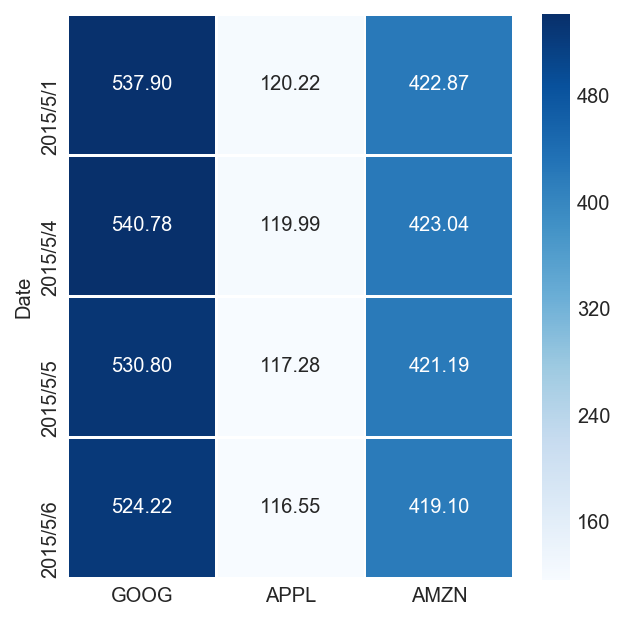

In [0]:
# e.g., sns.heatmap() expects the wide format
fig, ax = plt.subplots(figsize=(5, 5.2))
sns.heatmap(sp.set_index("Date"), fmt=".2f", 
            cmap="Blues", 
            linewidth=1, annot = True)
ax.set_ylim(len(sp)+0.01, 0) 
plt.show()

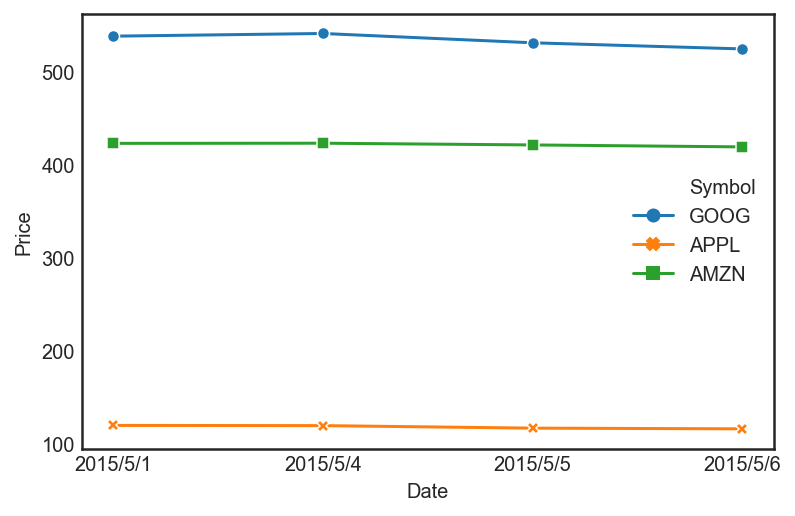

In [0]:
# e.g., sns.lineplot() expects the long format
fig, ax = plt.subplots(figsize=(6.2, 4))
sns.lineplot('Date', 'Price', 
             style='Symbol', hue='Symbol',
             markers=True, dashes=False, 
             data=sp_l, ax=ax)
plt.show()

---
 
### 2.8.1 Melting Data

 

[`melt()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) (and the corresponding [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html)) pushes data that is currently in columns into rows:

In [0]:
inspect.signature(pd.melt)

<Signature (frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)>

In [9]:
# !curl -L -s -o stockvolume.csv "https://drive.google.com/uc?id=14KlRbT6gGpSGoAiiyX8yf65EQK7Xrng0"
sv = pd.read_csv("stockvolume.csv")
sv_l = pd.melt(sv, id_vars='Date', var_name='Symbol', value_name='Volume')
display('sv', 'sv_l')

sv
       Date     GOOG      APPL     AMZN
0  2015/5/1  1768200  58512600  3565800
1  2015/5/4  1308000  50988300  2270400
2  2015/5/5  1383100  49271400  2856400
3  2015/5/6  1567000  72141000  2552500

sv_l
        Date Symbol    Volume
0   2015/5/1   GOOG   1768200
1   2015/5/4   GOOG   1308000
2   2015/5/5   GOOG   1383100
3   2015/5/6   GOOG   1567000
4   2015/5/1   APPL  58512600
..       ...    ...       ...
7   2015/5/6   APPL  72141000
8   2015/5/1   AMZN   3565800
9   2015/5/4   AMZN   2270400
10  2015/5/5   AMZN   2856400
11  2015/5/6   AMZN   2552500

[12 rows x 3 columns]


---

### 2.8.2 Pivoting Data


[`pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) (and its [method counterpart](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)) can pull the values across rows into their own columns, an operation that is the opposite of `melt()`:

In [0]:
inspect.signature(pd.pivot_table)

<Signature (data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')>

In [12]:
sp_w = pd.pivot_table(sp_l, values='Price', index='Symbol', columns='Date')
display('sp_l', 'sp_w')

,Date,Symbol,Price
0,2015/5/1,GOOG,537.900024
1,2015/5/4,GOOG,540.780029
2,2015/5/5,GOOG,530.799988
3,2015/5/6,GOOG,524.219971
4,2015/5/1,APPL,120.220688
...,...,...,...
7,2015/5/6,APPL,116.547424
8,2015/5/1,AMZN,422.869995
9,2015/5/4,AMZN,423.040009
10,2015/5/5,AMZN,421.190002


`values` specifies the columns from which values are used to fill the the resulting `DataFrame`, while `index` and `columns` specifies the column(s) to be used as its index and column. 




In [0]:
sp_w.index, sp_w.columns

(Index(['AMZN', 'APPL', 'GOOG'], dtype='object', name='Symbol'),
 Index(['2015/5/1', '2015/5/4', '2015/5/5', '2015/5/6'], dtype='object', name='Date'))

It is often desired to insert the index into a column using [`reset_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html):

In [0]:
inspect.signature(pd.DataFrame.reset_index)

<Signature (self, level=None, drop=False, inplace=False, col_level=0, col_fill='')>

In [0]:
sp_w.reset_index(inplace=True); sp_w

Date,Symbol,2015/5/1,2015/5/4,2015/5/5,2015/5/6
0,AMZN,422.869995,423.040009,421.190002,419.100006
1,APPL,120.220688,119.987633,117.283951,116.547424
2,GOOG,537.900024,540.780029,530.799988,524.219971


In [0]:
sp_w.columns.name = None; sp_w

,Symbol,2015/5/1,2015/5/4,2015/5/5,2015/5/6
0,AMZN,422.869995,423.040009,421.190002,419.100006
1,APPL,120.220688,119.987633,117.283951,116.547424
2,GOOG,537.900024,540.780029,530.799988,524.219971


To set a `DataFrame` index using existing columns, use [`set_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html), e.g., `sp_w.set_index('Symbol')`.

Beyond transforming data from "long" to "wide" format, `pivot_table()` also works as a data summarization tool, allowing for pivoting with aggregations of numeric data (defined by `aggfunc` that defaults to [`np.mean()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)) when pivoting results have multiple rows sharing the same key:
 

In [13]:
sp_s = pd.pivot_table(sp_l, values='Price', index='Symbol')  # aggfunc='mean' takes effect to aggregate multiple values
display('sp_l', 'sp_s')

,Date,Symbol,Price
0,2015/5/1,GOOG,537.900024
1,2015/5/4,GOOG,540.780029
2,2015/5/5,GOOG,530.799988
3,2015/5/6,GOOG,524.219971
4,2015/5/1,APPL,120.220688
...,...,...,...
7,2015/5/6,APPL,116.547424
8,2015/5/1,AMZN,422.869995
9,2015/5/4,AMZN,423.040009
10,2015/5/5,AMZN,421.190002


In [2]:
# !curl -L -s -o stockpricevolume.csv "https://drive.google.com/uc?id=1uTTi9dhZAUow6pRBHfOSz5BuLSbm6-ov"
st = pd.read_csv("stockpricevolume.csv"); st

,Date,Symbol,Price,Volume
0,2015/5/1,GOOG,537.900024,1768200
1,2015/5/4,GOOG,540.780029,1308000
2,2015/5/5,GOOG,530.799988,1383100
3,2015/5/6,GOOG,524.219971,1567000
4,2015/5/1,APPL,120.220688,58512600
...,...,...,...,...
7,2015/5/6,APPL,116.547424,72141000
8,2015/5/1,AMZN,422.869995,3565800
9,2015/5/4,AMZN,423.040009,2270400
10,2015/5/5,AMZN,421.190002,2856400


In [0]:
sp_agg1 = pd.pivot_table(sp_l, values='Price', index='Symbol')
st_agg1 = pd.pivot_table(st, values=['Price', 'Volume'], index='Symbol')
display('sp_agg1', 'st_agg1')

sp_agg1
             Price
Symbol            
AMZN    421.550003
APPL    118.509924
GOOG    533.425003

st_agg1
             Price    Volume
Symbol                      
AMZN    421.550003   2811275
APPL    118.509924  57728325
GOOG    533.425003   1506575

A string (for functions pandas consider built-in), a function, or a list thereof can be passed to `aggfunc` to indicate the desired aggregations, with all the aggregates computed at once. The resulting `DataFrame` has hierarchical columns whose top level are the function names:

In [0]:
st_agg2 = pd.pivot_table(st, values=['Price', 'Volume'], index='Symbol', aggfunc=['mean', max, np.min]); st_agg2

mean                   max                  amin          
             Price    Volume       Price    Volume       Price    Volume
Symbol                                                                  
AMZN    421.550003   2811275  423.040009   3565800  419.100006   2270400
APPL    118.509924  57728325  120.220688  72141000  116.547424  49271400
GOOG    533.425003   1506575  540.780029   1768200  524.219971   1308000

In [0]:
st_agg2.columns

MultiIndex(levels=[['mean', 'max', 'min'], ['Price', 'Volume']],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

Different operations can be applied to different columns by passing a dictionary mapping column names to operations:

In [0]:
st_agg3 = pd.pivot_table(st, values=['Price', 'Volume'], index='Symbol', 
                         aggfunc={'Price': [max, min], 'Volume': ['sum', lambda x: x.max()-x.min()]})
st_agg3

Price                Volume           
               max         min  <lambda>        sum
Symbol                                             
AMZN    423.040009  419.100006   1295400   11245100
APPL    120.220688  116.547424  22869600  230913300
GOOG    540.780029  524.219971    460200    6026300

The column names can be specified by passing a list of `(name, function)` tuples:

In [0]:
st_agg4 = pd.pivot_table(st, values=['Price', 'Volume'], index='Symbol', 
                         aggfunc={'Price': [("maximum", max), ('minimum', min)], 
                                  'Volume': [('difference', lambda x: x.max()-x.min())]})
st_agg4

Price                 Volume
           maximum     minimum difference
Symbol                                   
AMZN    423.040009  419.100006    1295400
APPL    120.220688  116.547424   22869600
GOOG    540.780029  524.219971     460200

---

## 2.9 The Split-Apply-Combine Paradigm


In many situations, we wish to compute summary statistics for different groups. 

Categorizing a dataset and applying a function to each group (whether be an aggregation or transformation) is often a critical component of a data analysis workflow.  

<img src="https://drive.google.com/uc?export=download&id=1USxwseQh7gp-OgAzuaALoozVp8iXGkeE" width=550 />


---

### 2.9.1 Splitting Data into Groups


Splitting data in a `DataFrame` into groups can be done by calling the `DataFrame`'s [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method, passing the name of the desired key column:

 

In [0]:
inspect.signature(pd.DataFrame.groupby)

<Signature (self, by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs)>

In [0]:
display('sp_l', 'st')

,Date,Symbol,Price
0,2015/5/1,GOOG,537.900024
1,2015/5/4,GOOG,540.780029
2,2015/5/5,GOOG,530.799988
3,2015/5/6,GOOG,524.219971
4,2015/5/1,APPL,120.220688
...,...,...,...
7,2015/5/6,APPL,116.547424
8,2015/5/1,AMZN,422.869995
9,2015/5/4,AMZN,423.040009
10,2015/5/5,AMZN,421.190002


In [15]:
sp_grby = sp_l.groupby('Symbol'); sp_grby

In [3]:
st_grby = st.groupby('Symbol'); st_grby

What is returned is not a set of `DataFrame`s, but a `DataFrameGroupBy` object that we can think of as a special view of the `DataFrame`.


The `GroupBy` object supports direct iteration over the groups, generating a sequence consisting of the group name along with the chunk of data:




In [0]:
for key, group in sp_grby: 
    print(key)
    print(group)

AMZN
        Date Symbol       Price
8   2015/5/1   AMZN  422.869995
9   2015/5/4   AMZN  423.040009
10  2015/5/5   AMZN  421.190002
11  2015/5/6   AMZN  419.100006
APPL
       Date Symbol       Price
4  2015/5/1   APPL  120.220688
5  2015/5/4   APPL  119.987633
6  2015/5/5   APPL  117.283951
7  2015/5/6   APPL  116.547424
GOOG
       Date Symbol       Price
0  2015/5/1   GOOG  537.900024
1  2015/5/4   GOOG  540.780029
2  2015/5/5   GOOG  530.799988
3  2015/5/6   GOOG  524.219971


In [0]:
for key, group in st_grby: 
    print(key)
    print(group)

AMZN
        Date Symbol       Price   Volume
8   2015/5/1   AMZN  422.869995  3565800
9   2015/5/4   AMZN  423.040009  2270400
10  2015/5/5   AMZN  421.190002  2856400
11  2015/5/6   AMZN  419.100006  2552500
APPL
       Date Symbol       Price    Volume
4  2015/5/1   APPL  120.220688  58512600
5  2015/5/4   APPL  119.987633  50988300
6  2015/5/5   APPL  117.283951  49271400
7  2015/5/6   APPL  116.547424  72141000
GOOG
       Date Symbol       Price   Volume
0  2015/5/1   GOOG  537.900024  1768200
1  2015/5/4   GOOG  540.780029  1308000
2  2015/5/5   GOOG  530.799988  1383100
3  2015/5/6   GOOG  524.219971  1567000


<div class='alert alert-info'>By default, the group keys are sorted during the groupby() operation, while the order in which observations are sorted within each group is preserved. Sorting groups can be switched off for potential speedups by passing sort=False.</div>



--- 

### 2.9.2 Aggregating Grouped Data

Pandas provides [many common aggregations](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#computations-descriptive-stats) that can be applied to `GroupBy` objects and return a scalar per group in the apply/combine steps:

In [20]:
display('sp_grby.mean()', 'st_grby.min()', 'st_grby.first()')

sp_grby.mean()
             Price
Symbol            
AMZN    421.550003
APPL    118.509924
GOOG    533.425003

st_grby.min()
            Date       Price    Volume
Symbol                                
AMZN    2015/5/1  419.100006   2270400
APPL    2015/5/1  116.547424  49271400
GOOG    2015/5/1  524.219971   1308000

st_grby.first()
            Date       Price    Volume
Symbol                                
AMZN    2015/5/1  422.869995   3565800
APPL    2015/5/1  120.220688  58512600
GOOG    2015/5/1  537.900024   1768200

The [`aggregate()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.aggregate.html) or [`agg()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.agg.html) method computes more flexibile aggregations all at once. 

The way to specify desired aggregations is similar to the use of the `aggfunc` keyword argument in `pivot_table()`. 

In [0]:
st_grby.agg({'Price':[('difference', lambda x: x.max()-x.min()), ('first', 'first'),  ('last', 'last')],
             'Volume': [('total volume', 'sum')]})                 

Price                               Volume
       difference       first        last total volume
Symbol                                                
AMZN     3.940003  422.869995  419.100006     11245100
APPL     3.673264  120.220688  116.547424    230913300
GOOG    16.560058  537.900024  524.219971      6026300

To suppress using group keys as indices in the aggregated output, we can pass `as_index=False` to `groupby()` when first creating the `GroupBy` object:

In [0]:
st.groupby('Symbol', as_index=False).agg({'Price':[('standard deviation', 'std')],
                                          'Volume': [('total volume', 'sum')]})    

,Symbol,Price,Volume
,,standard deviation,total volume
0,AMZN,1.834356,11245100
1,APPL,1.867686,230913300
2,GOOG,7.432934,6026300



---

#### Generic Group-wise Operations


 


`GroupBy` objects' [`apply()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.apply.html) allows us to apply an arbitrary function to grouped data and enables more generic group operations (aggregation, transformation, filtering, etc.).


The function passed to the `apply()` method should take a `DataFrame` and return either a Pandas object (e.g., `DataFrame`, `Series`) or a scalar.

Other inputs to the passed-in function are taken by the `apply()` method as additional arguments.

Suppose we want to select the top $n$ prices/volumes by stock. It's straightforward to write a function that selects the rows with the largest values in a particular column:

In [0]:
sp_l.sort_values(by="Price", ascending=False)

,Date,Symbol,Price
1,2015/5/4,GOOG,540.780029
0,2015/5/1,GOOG,537.900024
2,2015/5/5,GOOG,530.799988
3,2015/5/6,GOOG,524.219971
9,2015/5/4,AMZN,423.040009
...,...,...,...
11,2015/5/6,AMZN,419.100006
4,2015/5/1,APPL,120.220688
5,2015/5/4,APPL,119.987633
6,2015/5/5,APPL,117.283951


In [0]:
def top(df, n, column):
    return df.sort_values(by=column, ascending=False)[:n]

Calling `apply()` with this function applies it to each group:

In [0]:
display('st_grby.apply(top, 2, "Price")', 'st_grby.apply(top, 3, "Volume")')

st_grby.apply(top, 2, "Price")
              Date       Price    Volume
Symbol                                  
AMZN   9  2015/5/4  423.040009   2270400
       8  2015/5/1  422.869995   3565800
APPL   4  2015/5/1  120.220688  58512600
       5  2015/5/4  119.987633  50988300
GOOG   1  2015/5/4  540.780029   1308000
       0  2015/5/1  537.900024   1768200

st_grby.apply(top, 3, "Volume")
               Date       Price    Volume
Symbol                                   
AMZN   8   2015/5/1  422.869995   3565800
       10  2015/5/5  421.190002   2856400
       11  2015/5/6  419.100006   2552500
APPL   7   2015/5/6  116.547424  72141000
       4   2015/5/1  120.220688  58512600
       5   2015/5/4  119.987633  50988300
GOOG   0   2015/5/1  537.900024   1768200
       3   2015/5/6  524.219971   1567000
       2   2015/5/5  530.799988   1383100

By default, group keys are added to index with their corresponding columns kept in the output. To suppress this behavior, we can pass `group_keys=False` to `groupby()`:

In [0]:
st.groupby('Symbol', group_keys=False).apply(top, 2, "Price")

,Date,Symbol,Price,Volume
9,2015/5/4,AMZN,423.040009,2270400
8,2015/5/1,AMZN,422.869995,3565800
4,2015/5/1,APPL,120.220688,58512600
5,2015/5/4,APPL,119.987633,50988300
1,2015/5/4,GOOG,540.780029,1308000
0,2015/5/1,GOOG,537.900024,1768200


In [0]:
st.groupby('Symbol', group_keys=False).apply(top, 2, "Price").reset_index(drop=True)

,Date,Symbol,Price,Volume
0,2015/5/4,AMZN,423.040009,2270400
1,2015/5/1,AMZN,422.869995,3565800
2,2015/5/1,APPL,120.220688,58512600
3,2015/5/4,APPL,119.987633,50988300
4,2015/5/4,GOOG,540.780029,1308000
5,2015/5/1,GOOG,537.900024,1768200



---

### 2.9.3 Filtering Groups

`GroupBy` objects' [`filter()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html) method allows us to form criteria to drop data based on the group properties:



In [4]:
1e7

10000000.0

In [0]:
st_grby.filter(lambda x: x['Volume'].sum() > 1e7 )

,Date,Symbol,Price,Volume
4,2015/5/1,APPL,120.220688,58512600
5,2015/5/4,APPL,119.987633,50988300
6,2015/5/5,APPL,117.283951,49271400
7,2015/5/6,APPL,116.547424,72141000
8,2015/5/1,AMZN,422.869995,3565800
9,2015/5/4,AMZN,423.040009,2270400
10,2015/5/5,AMZN,421.190002,2856400
11,2015/5/6,AMZN,419.100006,2552500


---

## 2.10 Plotting Data (Optional)



A `DataFrame`'s [`plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method (a simple wrapper around the [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) method in matplotlib) allows us to easily create decent looking plots for data:

In [0]:
import matplotlib.pyplot as plt

In [0]:
sp.set_index('Date', inplace=True); sp # set the DataFrame index using existing columns

,GOOG,APPL,AMZN
Date,,,
2015/5/1,537.900024,120.220688,422.869995
2015/5/4,540.780029,119.987633,423.040009
2015/5/5,530.799988,117.283951,421.190002
2015/5/6,524.219971,116.547424,419.100006


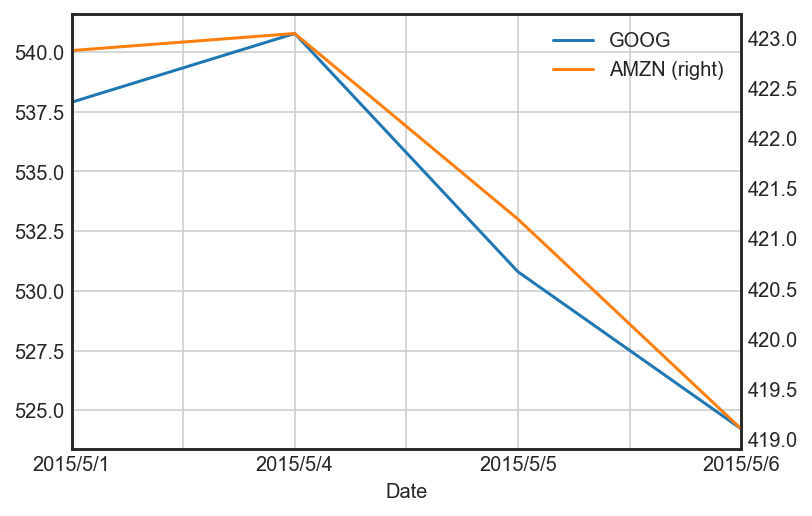

In [0]:
sp[['GOOG', 'AMZN']].plot(secondary_y=["AMZN"], 
                          grid=True)
plt.show()

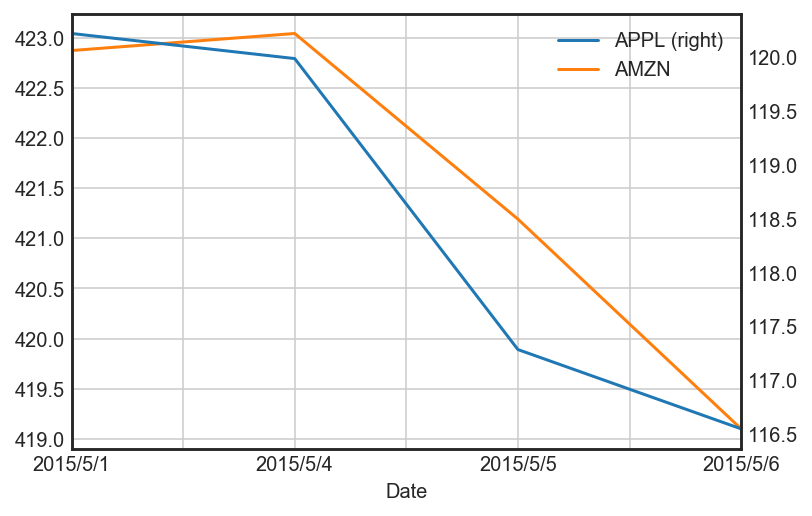

In [0]:
sp[['APPL', 'AMZN']].plot(secondary_y=["APPL"], 
                          grid=True)
plt.show()

A more informative and appealing plot can be created by using more sophisticated data visualization tools:

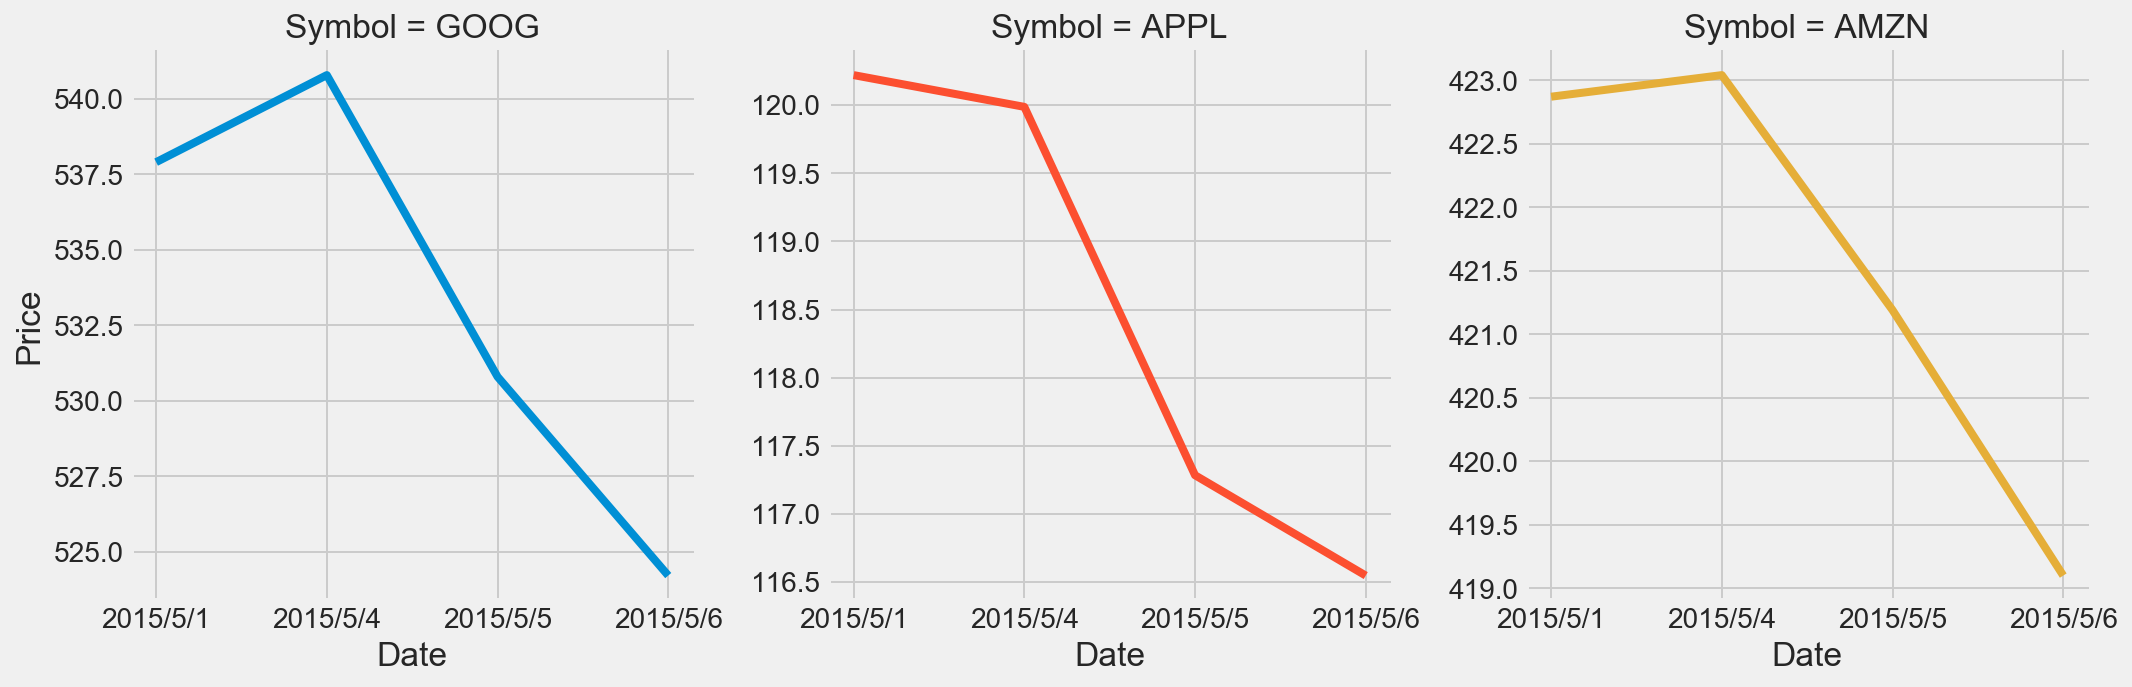

In [0]:
import seaborn as sns
with plt.style.context('fivethirtyeight'):
    p = sns.FacetGrid(sp_l, col="Symbol", hue="Symbol", height=5, sharey=False)
    p.map(sns.lineplot, "Date", "Price")